<a href="https://colab.research.google.com/github/swarnava-96/SVM-Kernel-Trick/blob/main/Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SVM Kernels**
### Importing the necessary libraries and creating datapoints

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creating the Datapoints
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [2]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

### Visualizing the datapoints

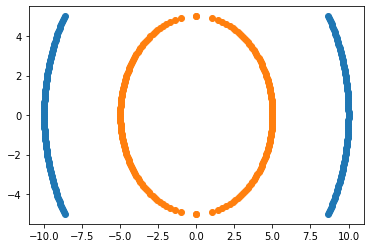

In [3]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [4]:
# Converting to DataFrame

import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = df1.append(df2)
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


### Independent and Dependent features

In [5]:
X = df.iloc[:, :2]  
y = df.Y

In [6]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

### SVC
#### Let's try with Linear kernel

In [7]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear")
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.45

We get a very poor accuracy as the points cannot be seperable by a plane.

#### Let's try with Polynomial Kernel

In [9]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [10]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [11]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

### 3D Visualization using Plotly

In [13]:
!pip install jupyter-dash

     |████████████████████████████████| 1.1 MB 9.6 MB/s 
     |████████████████████████████████| 3.7 MB 33.0 MB/s 
     |████████████████████████████████| 83 kB 3.2 MB/s 
     |████████████████████████████████| 1.8 MB 33.4 MB/s 
     |████████████████████████████████| 357 kB 59.0 MB/s 
  Created wheel for dash: filename=dash-1.21.0-py3-none-any.whl size=1100488 sha256=9e07fe3c70daaa6cf3ae2046fdc3c9d95f4a8ff1b841480bee00d7a0914daeb8
  Stored in directory: /root/.cache/pip/wheels/59/a4/f1/a7140afcad8dbaa3b1b12ef80843d29403d6ecca1c2f397948
  Created wheel for dash-core-components: filename=dash_core_components-1.17.1-py3-none-any.whl size=3738997 sha256=f22b9cff33f41b8a79101de34fc3bf13ab0b784b87f3ceb4996a7121bae3a300
  Stored in directory: /root/.cache/pip/wheels/ca/5b/fb/a135a7bf8e21223e4104aa5526a5173a20b64fe7fcd055b999
  Created wheel for dash-html-components: filename=dash_html_components-1.1.4-py3-none-any.whl size=319772 sha256=c58c2793a97ea1d05f4c9717b29456bb165bd7115fb5fa18af29f67

In [14]:
# Lets check out the data points in 3D
# Importing Plotly

import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
# build jupyter dash app 
app = JupyterDash(__name__)

# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

Let's use the features that we created

In [15]:
fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
# build jupyter dash app 
app = JupyterDash(__name__)

# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

Now the points can be easily seperated by using a plane

In [16]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

## Alternative way of using Kernels

In [18]:
# Let's plot the points again

import matplotlib.pyplot as plt
%matplotlib inline

# Creating the Datapoints
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

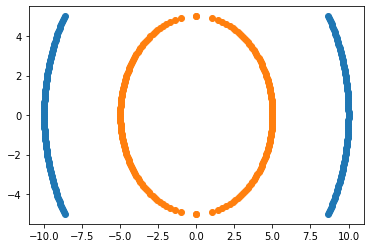

In [19]:
# Let's visualize the points

plt.scatter(y,x)
plt.scatter(y1,x1)

In [21]:
# Converting into DataFrame

import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = df1.append(df2)
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [22]:
### Independent and Dependent features
X = df.iloc[:, :2]  
y = df.Y

In [23]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#### RBF Kernel

In [24]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0